# Data visualisation of world tourism

First import useful libraries and data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

df_raw=pd.read_csv("world_tour.csv")
df_raw

,Entity,Code,Year,Unnamed: 3
0,Albania,ALB,1995,304000.0
1,Albania,ALB,1996,287000.0
2,Albania,ALB,1997,119000.0
3,Albania,ALB,1998,184000.0
4,Albania,ALB,1999,371000.0
...,...,...,...,...
5204,Zimbabwe,ZWE,2012,1794000.0
5205,Zimbabwe,ZWE,2013,1833000.0
5206,Zimbabwe,ZWE,2014,1880000.0
5207,Zimbabwe,ZWE,2015,2057000.0


Data source:https://ourworldindata.org/tourism

Do some data preprocesssing to make data according to your need

In [24]:
df_raw.rename(columns={'Entity':'Country',"Unnamed: 3":"No of Tourist"},inplace=True)
df_raw["No of Tourist in million"]=df_raw["No of Tourist"]/1000000
df_raw.drop(columns=["No of Tourist"],inplace=True)

In [25]:
df_raw.head()

,Country,Code,Year,No of Tourist in million
0,Albania,ALB,1995,0.304
1,Albania,ALB,1996,0.287
2,Albania,ALB,1997,0.119
3,Albania,ALB,1998,0.184
4,Albania,ALB,1999,0.371


# Worldwide

Text(0.5, 1.0, 'Worldwide tourist bar chart')

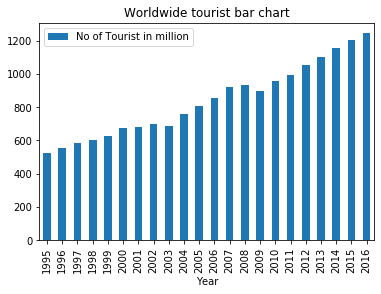

In [26]:
df_raw[df_raw["Country"]=="World"].plot(x="Year",y="No of Tourist in million",kind="bar")
plt.xlabel("Year")

plt.title("Worldwide tourist bar chart")


In [28]:
df_raw[df_raw["Country"]=="World"]["No of Tourist in million"].iplot()

uses index as x axis as index ,so let's make years as index and then plot this again(you can also pass x,y col_name).

In [29]:
df_raw.set_index("Year",inplace=True)



In [30]:
df_raw[df_raw["Country"]=="World"]["No of Tourist in million"].iplot(title="World Tourist yearwise",xTitle='Years',yTitle='Number of tourist (in millions)',
                                                               theme='Solar',color='red')

# The above graph is showing continous increasing behavior except for two points(Y2003 and Y2009).
reason:
2003
In 2003, international tourism lived through another considerably difficult year in which three negative factorscame together: the Iraq conflict, SARS and a persistently weak economy.The  volume  of  international  tourism  as  measured  in  international  tourist  arrivals  slid  by1.7% to 691 million(689M in our data ie slight difference due to different data sources), corresponding to a contraction of 12 million arrivals on the 2002 volume of 703 million(698M in our data ie slight difference due to different data sources)
for more click on link : https://www.e-unwto.org/doi/pdf/10.18111/9789284407910

2009

“The global economic crisis aggravated by the uncertainty around the A(H1N1) pandemic turned 2009 into one of the toughest years for the tourism sector”, said UNWTO Secretary-General Taleb Rifai.
 https://www.moodiedavittreport.com/international-tourism-arrivals-fall-by-4-in-2009/



  

In [31]:
df_raw.reset_index(inplace=True)

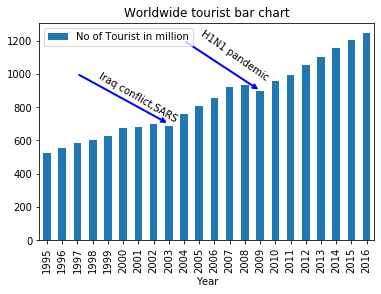

In [32]:

df_raw[df_raw["Country"]=="World"].plot(x="Year",y="No of Tourist in million",kind="bar")
plt.xlabel("Year")

plt.title("Worldwide tourist bar chart")
#2003
# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(8,700),             # place head of the arrow 
             xytext=(2, 1000),         # place base of the arrow 
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('Iraq conflict,SARS', # text to display
             xy=(3.3,700),                    # start the text at at point .
             rotation=330,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

#2009
# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(14,900),             # place head of the arrow 
             xytext=(9, 1200),         # place base of the arrow 
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('H1N1 pandemic', # text to display
             xy=(10,950),                    # start the text at at point .
             rotation=325,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )


plt.show()


# Region-wise

In [43]:
df_region=pd.read_csv("international-tourist-arrivals-by-world-region.csv")
df_region.head()

,Entity,Code,Year,(arrivals)
0,Africa,NaN,1950,500000
1,Africa,NaN,1960,800000
2,Africa,NaN,1965,1400000
3,Africa,NaN,1970,2400000
4,Africa,NaN,1975,4700000


In [47]:
df_region["No of tourist in million"]=df_region[" (arrivals)"]/1000000
df_region.rename(columns={"Entity":"Region"},inplace=True)
df_region.drop(columns=["Code"," (arrivals)"],inplace=True)
df_region.set_index("Year",inplace=True)
df_region.tail()

,Region,No of tourist in million
Year,,
2014,Middle East,55.4
2015,Middle East,55.9
2016,Middle East,53.6
2017,Middle East,58.0
2018,Middle East,64.0


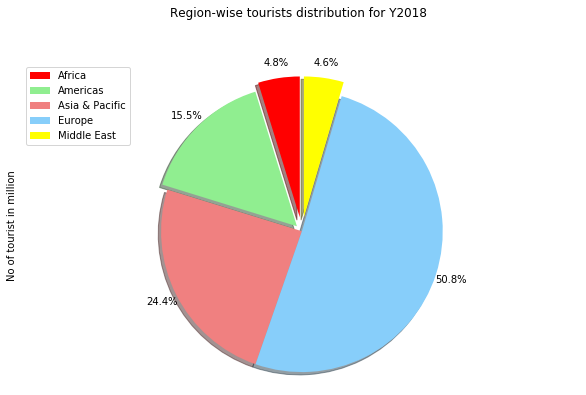

In [49]:
colors_list = ['red','lightgreen','lightcoral','lightskyblue','yellow']
explode_list = [0.1,0.05,0,0,0.1]
df_region[df_region.index==2018]['No of tourist in million'].plot(kind='pie',
                                                                 figsize=(10,6),autopct='%1.1f%%',pctdistance=1.11,
                                                                 colors=colors_list,explode = explode_list,labels=None,
                                                                 startangle=90,shadow=True)
plt.title('Region-wise tourists distribution for Y2018 ',y=1.12)
plt.legend(df_region[df_region.index==2018].Region,loc = 'upper left')
plt.axis('equal')
plt.show()

Text(0.5, 0, 'tourist in million')

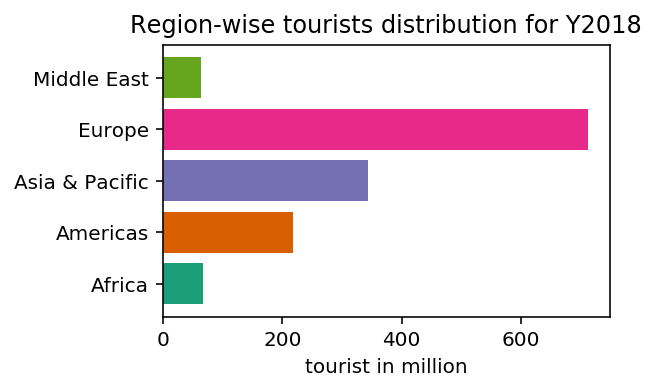

In [50]:
fig,ax=plt.subplots(figsize=(4,2.5),dpi=144)
color=plt.cm.Dark2(range(5))
y=df_region[df_region.index==2018]["Region"]
width=df_region[df_region.index==2018]["No of tourist in million"]
ax.barh(y=y,width=width,color=color)
ax.set_title("Region-wise tourists distribution for Y2018")
ax.set_xlabel("tourist in million")


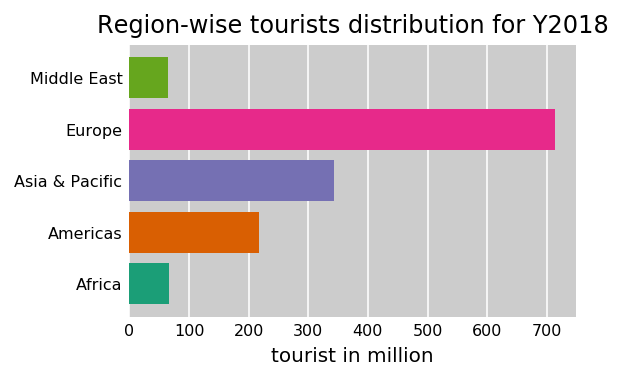

In [51]:
def nice_axes(ax): #so that we don't have set grid,facecolor etc everytime.
    ax.set_facecolor('.8')  # 0 to 1 ->black to white resp
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)                  # make it false and see change 
    [spine.set_visible(False) for spine in ax.spines.values()]  # make it true and see change
    
nice_axes(ax)
fig



In [61]:
years=list(df_region.index.unique())

In [64]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation


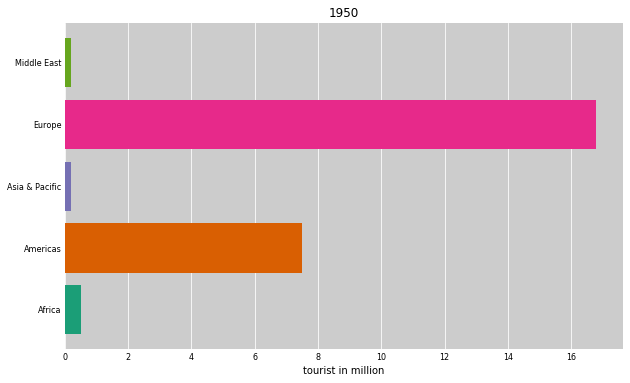

In [82]:
colors=plt.cm.Dark2(range(5))
def bar_chart(year):
    ax.clear()
    y=df_region[df_region.index==year]["Region"]
    width=df_region[df_region.index==year]["No of tourist in million"]
    ax.barh(y=y,width=width,color=color)

    ax.set_title(year)
    ax.set_xlabel("tourist in million")
    nice_axes(ax)
fig, ax = plt.subplots(figsize=(10,6))
animator = FuncAnimation(fig, bar_chart, frames=years)
HTML(animator.to_jshtml())
    

for more see the link: https://www.dunderdata.com/blog/create-a-bar-chart-race-animation-in-python-with-matplotlib

# Country-wise

In [16]:
df_raw

,Year,Country,Code,No of Tourist in million
0,1995,Albania,ALB,0.304
1,1996,Albania,ALB,0.287
2,1997,Albania,ALB,0.119
3,1998,Albania,ALB,0.184
4,1999,Albania,ALB,0.371
...,...,...,...,...
5204,2012,Zimbabwe,ZWE,1.794
5205,2013,Zimbabwe,ZWE,1.833
5206,2014,Zimbabwe,ZWE,1.880
5207,2015,Zimbabwe,ZWE,2.057


In [17]:
import plotly.express as px
fig = px.choropleth(df_raw, locations="Code", color="No of Tourist in million",
                    color_continuous_scale="greens" ,hover_name="Country", 
                    animation_frame="Year",range_color=[0,100])
fig.update_layout(
    title_text='Choropleth map for tourist by country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://ourworldindata.org/tourism">\Our World in Data</a>',
        showarrow = False
    )]
)
fig.show()

# India


india tourism 
iplot (reason for sudden increament in 2014)
REASON: In 2014, 184,298 foreign patients traveled to India to seek medical treatment.(source:wiki)
Foreign exchange earnings from tourism in India:https://en.wikipedia.org/wiki/Tourism_in_India(lineplot)
Top 10 countries in no of tourists to india(pie chart)


In [83]:
df_india = df_raw[df_raw['Country'] == 'India']
df_india.set_index('Year',inplace=True)
df_india.head()

,Country,Code,No of Tourist in million
Year,,,
1995,India,IND,2.124
1996,India,IND,2.288
1997,India,IND,2.374
1998,India,IND,2.359
1999,India,IND,2.482


In [84]:
fig = px.line(df_india,x= df_india.index,y='No of Tourist in million')
fig.update_layout(title="Line plot <br>" +
           "<i>Number of tourist visiting india </i> <br>",
            title_font_size=20,paper_bgcolor='black',title_font_color = 'yellow',title_font_family='Aerial',
            font={'color':'white','family':'Times New Roman','size':15},
            height = 500,
            template = 'plotly_white'
                 ),
fig.add_layout_image(
        dict(
            source="https://images.yourstory.com/cs/wordpress/2015/05/Yourstory_India_tourism.jpg?fm=png&auto=format",
            xref='x',
            yref='y',
            x=1995,
            y=16,
            sizex=22,
            sizey=16,
            sizing='stretch',
            opacity=0.5,
            layer="below")),
fig.update_xaxes(showgrid=True,linecolor='black',linewidth=2)
fig.update_yaxes(linecolor='black',linewidth=2)

Reason for sudden increment in 2014 :In 2014, 184,298 foreign patients traveled to India to seek medical treatment.(source:wiki)

top contributing countries to indian tourism(by no of tourists in Y2018)

In [86]:

India = pd.read_html('https://en.wikipedia.org/wiki/Tourism_in_India')[3]
India

,Rank,Country,Number,Share in %
0,1,Bangladesh,2256675,21.37
1,2,United States,1456678,13.80
2,3,United Kingdom,1029758,9.75
3,4,Sri Lanka,353684,3.35
4,5,Canada,351040,3.32
5,6,Australia,346486,3.28
6,7,Malaysia,319172,3.02
7,8,China,281768,2.67
8,9,Germany,274087,2.60
9,10,Russia,262309,2.48


In [87]:
India.drop(index=[10,12],inplace=True)

In [88]:
fig = px.pie(India,values ='Share in\xa0%',names='Country')
fig.update_layout(title='Pie Chart<br>'+"<i>Top 10 countries visiting India<i>",
                 title_font_family ='Times New Roman')

In [94]:
India_earning = pd.read_html("https://en.wikipedia.org/wiki/Tourism_in_India")[2]
India_earning

,Year,Earnings (US$ million),% change,Earnings (₹ crores),% change.1
0,1997,2889,2.0,10511,4.6
1,1998,2948,2.0,12150,15.6
2,1999,3009,2.1,12951,6.6
3,2000,3460,15,15626,20.7
4,2001,3198,−7.6,15083,−3.5
5,2002,3103,−3.0,15064,−0.1
6,2003,4463,43.8,20729,37.6
7,2004,6170,38.2,27944,34.8
8,2005,7493,21.4,33123,18.5
9,2006,8634,15.2,39025,17.8


In [95]:
fig = px.bar(India_earning,x='Year',y='Earnings (₹ crores)')
fig.update_layout(template = 'plotly_white',
                 title = 'Earning from tourism in India',
                  title_font_family = 'Times New Roman',
                 title_font_size = 28),
fig.show()

Share of top 10 states/UTs of India in number of foreign tourist visits in 2017

In [96]:
India_states = pd.read_html("https://en.wikipedia.org/wiki/Tourism_in_India")[5]
India_states

,Rank,State/Union Territory,Number,Share in %
0,1,Maharashtra,5078514,18.9
1,2,Tamil Nadu,4860455,18.1
2,3,Uttar Pradesh,3104062,13.3
3,4,Delhi,2379169,10.2
4,5,Rajasthan,1489500,6.4
5,6,West Bengal,1475311,6.3
6,7,Kerala,977479,4.2
7,8,Bihar,923737,4.0
8,9,Karnataka,636502,2.7
9,10,Goa,541480,2.3


In [97]:
India_states.drop(index=[10,12],inplace=True)

In [99]:
px.pie(India_states,values='Number',names='State/Union Territory',title= "state-wise foreign tourist visits in 2017")

# France(Most visited country)

Tourism in France directly contributed 79.8 billion euros to gross domestic product, 30% of which comes from international visitors and 70% from domestic tourism spending. The total contribution of travel and tourism represents 9.7% of GDP and supports 2.9 million jobs (10.9% of employment) in the country.

France was visited by 89 million foreign tourists in 2018, making it the most popular tourist destination in the world, however considering the number of nights spent in the country, it is in sixth place, after United States, United Kingdom, China, Spain and Italy.France ranks fifth in tourist spending behind the United Kingdom, United States, China and Spain

France has 37 sites inscribed in the UNESCO's World Heritage List 
https://en.wikipedia.org/wiki/List_of_World_Heritage_Sites_in_France

let's have a look on these sites with folium

In [19]:
#Folium

In [100]:
import folium
m=folium.Map(zoom_start=7,location=[48.8566,2.3522])
m

In [101]:
from folium import IFrame
import os
import base64


In [102]:
df = pd.read_excel('France_tourist sites.xlsx')
df.columns.values

array(['Property', 'Unnamed: 1', 'Region', 'Unnamed: 3', '(lat,long)',
       'Unnamed: 5', 'IMG_LOC'], dtype=object)

In [103]:
df.drop(['Unnamed: 1','Unnamed: 3','Unnamed: 5'],axis=1,inplace=True)

In [104]:
df.head()

,Property,Region,"(lat,long)",IMG_LOC
0,Abbey Church of Saint-Savin-sur-Gartempe,Nouvelle Aquitaine,"(46.5647,0.8658)",1.jpg
1,Cistercian Abbey of Fontenay,Bourgogne-Franche-Comté,"(47.6396,4.3893)",2.jpg
2,"Arles, Roman and Romanesque Monuments",Provence-Alpes-Côte d'Azur,"(43.6770,4.6306)",3.jpg
3,"Vézelay, Church and Hill",Bourgogne-Franche-Comté,"(47.4664,3.7487",4.jpg
4,Belfries of Belgium and France,Hauts-de-France,"(50.8511, 2.8855)",5.jpg


In [108]:
l=df.iloc[1,2].split(",")
l

['(47.6396', '4.3893)']

In [107]:
float(l[0].split("(")[1])

47.6396

In [110]:
html='<img src="data:image/jpg;base64,{}">'.format #see basic tutorials of html 
picture=base64.b64encode(open("1.jpg","rb").read()).decode()
iframe =IFrame(html(picture),width=150+20,height=100+20)
popup= folium.Popup(iframe,max_width=200)
x=float(l[0].split("(")[1])
y=float(l[1].split(")")[0])
loc=[x,y]
folium.Marker(location=loc,
             popup=popup,tooltip=df.iloc[0,0]).add_to(m)
m

In [111]:
x_list=[]
y_list=[]
for i,row in df.iterrows():
    x=float(row["(lat,long)"].split(",")[0].split('(')[1])
    y=float(row['(lat,long)'].split(",")[1].split(')')[0])
    x_list.append(x)
    y_list.append(y)
    

In [112]:
df['X']=x_list
df['Y']=y_list
df

,Property,Region,"(lat,long)",IMG_LOC,X,Y
0,Abbey Church of Saint-Savin-sur-Gartempe,Nouvelle Aquitaine,"(46.5647,0.8658)",1.jpg,46.56470,0.86580
1,Cistercian Abbey of Fontenay,Bourgogne-Franche-Comté,"(47.6396,4.3893)",2.jpg,47.63960,4.38930
2,"Arles, Roman and Romanesque Monuments",Provence-Alpes-Côte d'Azur,"(43.6770,4.6306)",3.jpg,43.67700,4.63060
3,"Vézelay, Church and Hill",Bourgogne-Franche-Comté,"(47.4664,3.7487",4.jpg,47.46640,3.74870
4,Belfries of Belgium and France,Hauts-de-France,"(50.8511, 2.8855)",5.jpg,50.85110,2.88550
5,"Bordeaux, Port of the Moon",Nouvelle Aquitaine,"(44.8378, -0.5792)",6.jpg,44.83780,-0.57920
6,Canal du Midi,Occitanie,"(43.6110 ,43.6110 )",7.jpg,43.61100,43.61100
7,Amiens Cathedral,Hauts-de-France,"(49.8946, 2.3020)",8.jpg,49.89460,2.30200
8,Bourges Cathedral,Centre-Val de Loire,"(47.0822, 2.3992)",9.jpg,47.08220,2.39920
9,Chartres Cathedral,Centre-Val de Loire,"(48.4478,1.4878)",10.jpg,48.44780,1.48780


In [113]:
for index,row in df.iterrows():
    html='<img src="data:image/jpg;base64,{}">'.format #see basic tutorials of html 
    picture=base64.b64encode(open(row["IMG_LOC"],"rb").read()).decode()
    iframe =IFrame(html(picture),width=150+20,height=120+20)
    popup= folium.Popup(iframe,max_width=250)
    
    folium.Marker(location=[row["X"],row["Y"]],
                 tooltip=row["Property"],
                  popup=popup,
                 icon=folium.Icon(color="red",icon="info-sign")).add_to(m)
m

That's all!
Thanks for spending your precious time on our notebook.
This is our first notebook for dataviz, we have tried our best to extract uneven points from data with the help of charts.In case we missed something important please comment it out below.
Once again thank you.